### Final Evaluation

In this notebook, we evaluate the final model obtained in the previous notebook on the complete dataset, comprising of all 5 data files created in the Exploratory Analysis notebook.

The data shall be divided in a ratio of 7:3 for training and testing data and the model used will be XGBoost with n_features = 200 on data processed by ADASYN

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from xgboost.sklearn import XGBClassifier
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def refine_df (input_df):
    input_df.drop("Unnamed: 0", 1, inplace=True)
    input_df=input_df.replace(np.NaN, 0)
    input_df=input_df.replace('No', 0)
    input_df=input_df.replace('Yes', 1)
    return input_df

In [3]:
df = pd.read_csv("Datasets/ohe_sampled_cc_2.csv")

df = refine_df(df)

df_new = pd.DataFrame(columns=df.columns)

### Data Reading and Splitting into Training and Testing

Over here, we import the datasets into the dataframe and iteratively apply ADASYN on each of the five data files for computational efficiency. It would to some extent reduce the performance of ADASYN since the synthetic features are added on a set as a whole, but all our data subsets have similar characteristics as they've been sampled with the same algorithm. Thus, the ADASYN loss incurred would be negligible

In [10]:
from imblearn import over_sampling
ada = over_sampling.ADASYN(random_state=0)

X = []
y = []

for i in range(1,6):
    df = pd.read_csv("Datasets/ohe_sampled_cc_" + str(i) + ".csv")
    df = refine_df(df)
    y_temp= df["Is_Fraud"]  
    X_temp= df.drop(["Is_Fraud"],axis=1)a
    X_temp, y_temp = ada.fit_resample(X_temp, y_temp)
    print("resample done")
    X.append(X_temp)
    y.append(y_temp)

#X = pd.DataFrame(X)
#y = pd.DataFrame(y)

resample done
resample done
resample done
resample done
resample done


In [14]:
X_new = pd.DataFrame(X[0])
y_new = pd.DataFrame(y[0])

for i in range (1,5):
    X_new = X_new.append(pd.DataFrame(X[i]))
    y_new = y_new.append(pd.DataFrame(y[i]))
    
X_new

,Merchant_State=AA,Merchant_State=AK,Merchant_State=AL,Merchant_State=AR,Merchant_State=AZ,Merchant_State=Albania,Merchant_State=Algeria,Merchant_State=Andorra,Merchant_State=Angola,Merchant_State=Antigua and Barbuda,...,Year,Month,Day,Time,Amount,Merchant_Name,Merchant_City,Zip,MCC,Errors
0,0,0,0,0,0,0,0,0,0,0,...,2015,11,15,12,287.130000,-8194607650924472320,45373,45373,3001,283908
1,0,0,0,0,0,0,0,0,0,0,...,2015,11,15,13,2.410000,-7759074308363762688,45373,45373,5651,283908
2,0,0,0,0,0,0,0,0,0,0,...,2015,11,16,9,50.810000,-551332107213382080,45373,45373,4411,283908
3,0,0,0,0,0,0,0,0,0,0,...,2015,11,16,9,248.360000,4872340518840476672,45373,45373,5732,283908
4,0,0,0,0,0,0,0,0,0,0,...,2015,11,16,11,473.000000,-8566951830324093952,45373,45373,3640,283908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519913,0,0,0,0,0,0,0,0,0,0,...,2017,5,11,14,125.629137,3189517333335617024,24441,24411,5311,283991
519914,0,0,0,0,0,0,0,0,0,0,...,2014,6,8,14,141.781354,3189517333335617024,45373,45373,5311,283991
519915,0,0,0,0,0,0,0,0,0,0,...,2018,4,19,10,87.753840,3189517333335617024,12276,12228,5311,283991
519916,0,0,0,0,0,0,0,0,0,0,...,2017,6,21,13,77.487665,3189517333335617024,19519,19481,5311,283991


In [17]:
classes=y_new['Is_Fraud'].value_counts()
normal_share=classes[0]/y_new['Is_Fraud'].count()*100
fraud_share=classes[1]/y_new['Is_Fraud'].count()*100
print(normal_share)
print(fraud_share)

50.18583982860901
49.814160171390995


We can see that ADASYN has successfully resolved class imbalance

In [18]:
del df
del X
del y

In [19]:
X = X_new
y = y_new

from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, train_size=0.7, random_state=42)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [2442923 1364929  181176 ... 1724581  137856 1715933] TEST: [ 585657 1273312  372745 ... 1995059 1484566 1099513]
TRAIN: [1915906    9978 2385582 ...  952211 2078430 2289137] TEST: [ 558321 2489003  919053 ...  176866 1045071 1957846]
TRAIN: [1599405 2000722 1778361 ... 2423827 2585155 1738590] TEST: [2499373 1777928 1551292 ...     844 2227629 1650337]
TRAIN: [ 778956  714953 2046476 ... 1345925  731107 1303497] TEST: [1338430 1080941  495069 ...   51157 1810142 2099284]
TRAIN: [2368229   84348 2532322 ... 2050203 2381320 1847166] TEST: [1848492 2318946  127088 ... 1950589  608261 1496349]


### Model Fitting and Evaluation

In [20]:
def print_metrics(y_test, y_pred):
    print("------ Test Scores: -------")
    print( [metrics.recall_score(y_test, y_pred, average="binary")] )
    print ( [metrics.precision_score(y_test, y_pred, average="binary")] )
    print ( [metrics.f1_score(y_test, y_pred, average="binary")] )
    print()

In [21]:
def get_metrics(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_metrics(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)

[13:48:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------ Test Scores: -------
[0.9871958066202]
[0.9914642068338314]
[0.9893254027929747]



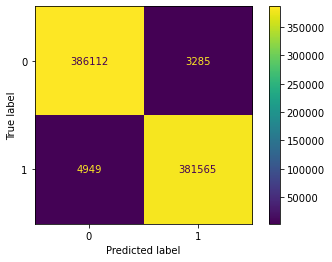

In [23]:
xgb = XGBClassifier(n_estimators=200)

get_metrics(X_train, y_train, X_test, y_test, xgb)

### Therefore, the final testing f1-score of XGBoost with ADASYN is 0.9893254027929747 or 98.933% with a precision of 98.719%